In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
df = pd.read_csv('dataset/airline_train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [25]:
# drop first 2 columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

<Axes: ylabel='count'>

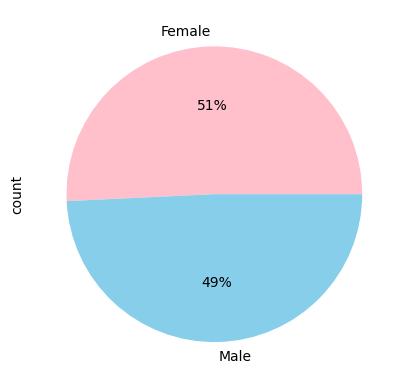

In [26]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['pink', 'skyblue'])

<Axes: ylabel='count'>

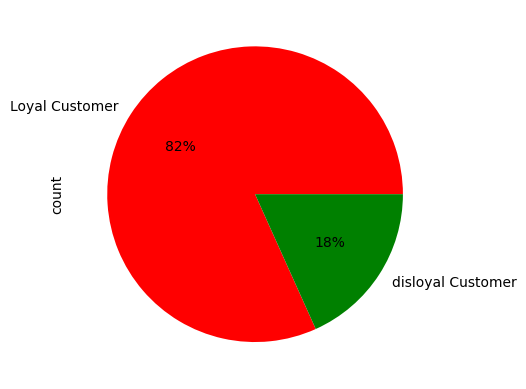

In [27]:
df['Customer Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green'])

<Axes: ylabel='count'>

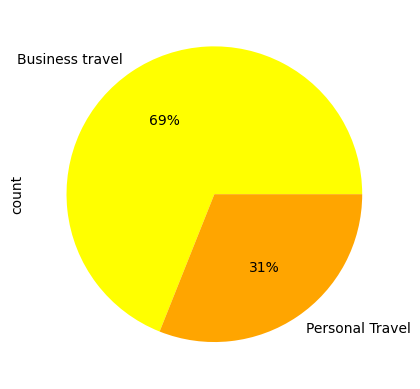

In [28]:
df['Type of Travel'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['yellow', 'orange'])

<Axes: ylabel='count'>

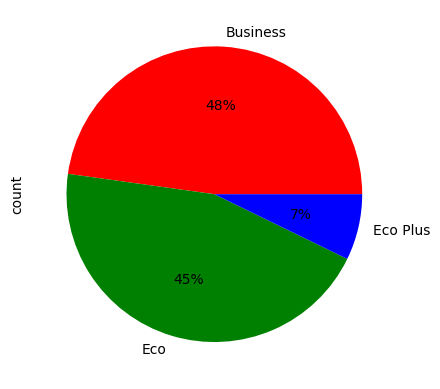

In [29]:
df['Class'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green', 'blue'])

<Axes: ylabel='count'>

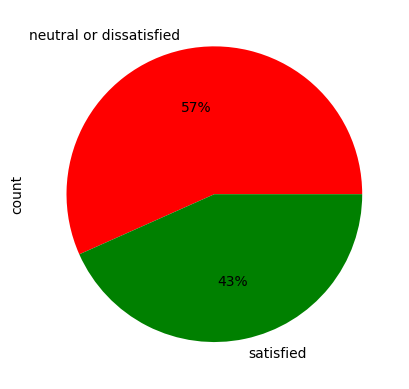

In [30]:
df['satisfaction'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['red', 'green'])

<Axes: xlabel='Age', ylabel='Count'>

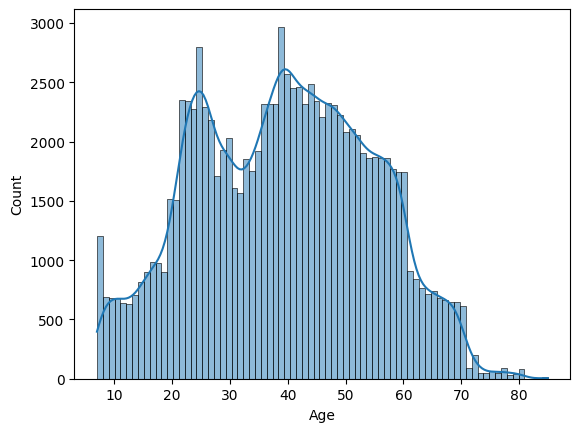

In [31]:
# age histogram plot
sns.histplot(df['Age'], kde=True)

In [32]:
# Distribution of all numerical column

# Selecting all numerical columns except age
num_col = df.select_dtypes(exclude='object').columns[1:]
num_col

Index(['Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [33]:
# Data Preprocessing
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [34]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [52]:
from scipy import stats

for i in num_col:
    z_scores = np.abs(stats.zscore(df[i]))
    outliers_count = np.sum(z_scores > 3)
    
    print(f"Column: {i}, outliers: {outliers_count}")


Column: Flight Distance, outliers: 58
Column: Inflight wifi service, outliers: 0
Column: Departure/Arrival time convenient, outliers: 0
Column: Ease of Online booking, outliers: 0
Column: Gate location, outliers: 0
Column: Food and drink, outliers: 0
Column: Online boarding, outliers: 0
Column: Seat comfort, outliers: 0
Column: Inflight entertainment, outliers: 0
Column: On-board service, outliers: 0
Column: Leg room service, outliers: 0
Column: Baggage handling, outliers: 0
Column: Checkin service, outliers: 0
Column: Inflight service, outliers: 3
Column: Cleanliness, outliers: 0
Column: Departure Delay in Minutes, outliers: 2222
Column: Arrival Delay in Minutes, outliers: 2225


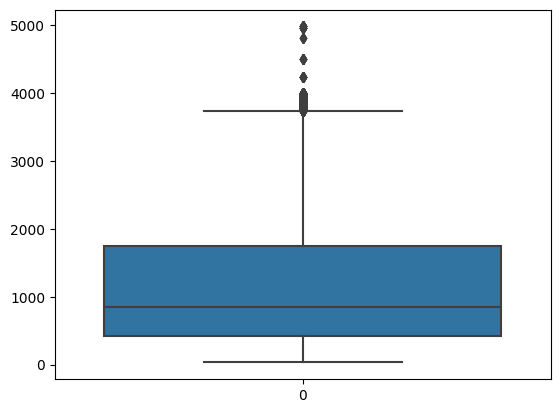

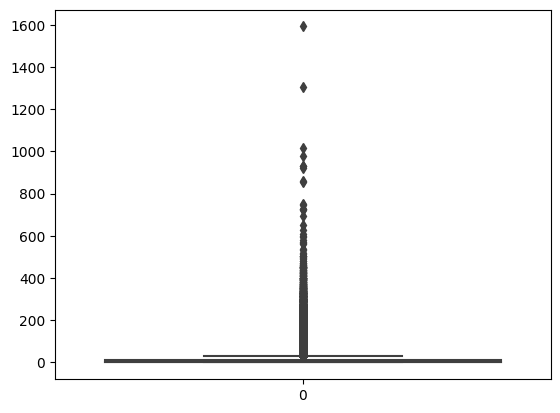

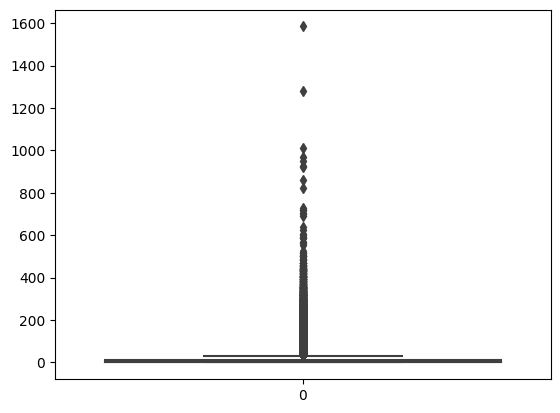

In [56]:
outliers_col = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
# visualizing outliers
for i in outliers_col:
    sns.boxplot(df[i])
    plt.show()
